# Capstone Proposal: Pipeline Analysis of Patients from PancDB
#### Kevin Jou

In this capstone proposal, I suggest a pipeline analysis be built from scRNAseq data published by PancDB, specifically that of isolated islet samples from patients to analyze whether or not there is an impact on the known regenerative signaling pathways from diseases like diabetes.  If so, then it may be possible to better understand the functions of these genes in multiple cell lines as I will bring in scRNAseq data from diabetic patients for comparison.

There is a theory that having diabetes or being pre-diabetic can increase the risk of an HPV due to the adverse affects it has on the immune system as shown by clinical data run on a Chinese cohort.[1]  The specific biological mechanisms are still not well understood, so adding more single cell data to possibly show differences on a smaller resolution can help provide evidence to better support or understand these effects.

It is currently possible to perform the analysis using packages within Python and Linux like scanpy, Hisat3N, fastqc, numpy, and ggplot2.  Each of these publically available libraries serve to align sequence data, produce read counts, perform principal component analysis to reduce dimensionality, and then graph and analyze the population statistics to see if there is a significant trend.

# Methodology
The plan to process the data will be done in a pre-processing, alignment, and analysis step, roughly outlined as follows:

All of the code will be written in Jupyter for ease of review, although compiling the code will require a Linux environment (in this case WSL2).

### Pre-Processing(Linux):
FastQC check of scRNAseq data to ensure read quality does not influence alignment results.

Trimming of low quality regions if necessary.

### Alignment(Linux):

Alignment of scRNAseq reads to reference chromosome GrCh38 using Hisat2N.

Output a gene count table for each cell to use in processing with scanpy.  Annotate cells with Human ID and disease state for downstream analysis.

### Analysis(Python):
Load cells into Scanpy h5ead data object for processing using scanpy package in Python.

Ensure each cell is identified with their associated donor, and then combine datasets to perform PCA analysis using t-SNE and  UMAP projections.

Compare graphs to that of diabetic and healthy human pancreatic cells to see if there is any significant differences.  Include triple positive Sox9, Pdx-1, NKX6-1 grouping.

Look into which genes are significantly contributing to the grouping of cells based on distance clustering.

Take top hits for genes and complete KEGG pathway analysis to add context and help better understand what may be impacted by infection of HPV and how having diabetes can increase ones risk to contracting HPV.

## Literature Review

## Paper 1: Identification of unique sub-populations in pancreatic ductal cells.

Currently identified via upregulation of triple-positive factors Sox9, Pdx1, and NKX6.1, these progenitor-like cells show ability to differentiate into both endocrine and exocrine cell lineages which indicate their potential in the regeneration of the pancreas.  Understanding the conditions in which these cells are activated and proliferate are key to understanding the regenerative pathways that the pancreas, and in turn other similar digestive epithelial tissues, may use.

The establishment of this cell sub-population allows for the observation of the cells in different biological conditions to see how progenitor-like cells may react.  In cases where the tissue is likely to be negatively impacted, such as in diabetes or HPV, it is possible that we may see shared effects on the progenitor-like population which may further improve understanding of how these cells operate and respond to external stimuli.

This paper provides the general genetic panel for normal pancreatic tissue, as well as the markers to target for population subsetting for further downstream analysis.

### Citation:

Zook HN, Quijano JC, Ortiz JA, Donohue C, Lopez K, Li W, Erdem N, Jou K, Crook CJ, Garcia I Jr, Kandeel F, Montero E, Ku HT. Activation of ductal progenitor-like cells from adult human pancreas requires extracellular matrix protein signaling. iScience. 2024 Feb 15;27(3):109237. doi: 10.1016/j.isci.2024.109237. PMID: 38433896; PMCID: PMC10904999.

## Paper 2: Diabetes is associated with persistent HPV infection

A cross-sectional study collected from the Obstetrics & Gynecology Hospital of Fudan University over 50 years showed a marked increase in risk for HPV infection associated with HbA1c levels, an indirect measure of blood sugar content.  Showing a saturation effect after HbA1C > 5.7% (clinically pre-diabetic), the risk ratio for HPV infection for women with diabetes was 1.18 (95% CI: 1.04-1.33).  Sensitivity analysis showed risk ratio for HPV infection was 1.47 (95% CI: 1.07-1.91) when diabetes was associated with vaginitis.  The relationship suggested here may imply some sort of synergystic effect of diabetes and HPV, rather than diabetes not factoring into HPV infection.

Diabetes can impact the immune system and metabolism in ways that may make is easer for many infections to take place in the body.  Considering HPV's strong correlation to squamous cell cancers, the connection to diabetes, which is increasing in prevalence worldwide, can provide insightful data in the pathways that these diseases affect which lead to their symptoms.  

To this end, the data provided from this paper will serve as evidence of justification to compare the impacts of diabetes and HPV independantly from one another in a pancreatic environment in an attempt to collect more information which could further understanding of the relationship between the two diseases.

### Citation:

Yue C, Zhang C, Ying C, Jiang H. Diabetes associated with HPV infection in women aged over 50 years: A cross-sectional study from China's largest academic woman's hospital. Front Endocrinol (Lausanne). 2022 Nov 14;13:972963. doi: 10.3389/fendo.2022.972963. PMID: 36452321; PMCID: PMC9701707.b

## Paper 3: Analyzing the data in Python with Scanpy

Using the packages provided in Scanpy, it is possible to take gene count data and perform a variety of comparative analysis such as Principal Compenent Analysis, Differential gene Expression, and visualizations like heat maps and dot plots which may help interpret the data.

Scanpy is able to transform the gene count data produced from an alignment such as from HISAT into an object which can then be modified and tagged for downstream analysis.  By wrapping a majority of the necessary functions needed for single cell analysis into one package, it makes establishing pipeline analyses easier and with less dependencies.

This paper provides some of the mathematical modeling used in the package's latest version to prove the robustness of the analysis performed by this library.  I will use the tools provided by Scanpy to analyze the single cell data I produce.

### Citation:

Wolf, F., Angerer, P. & Theis, F. SCANPY: large-scale single-cell gene expression data analysis. Genome Biol 19, 15 (2018). https://doi.org/10.1186/s13059-017-1382-0

## Paper 4: Analysing high-throughput sequencing data in Python with HTSeq 2.0 
The HTSeq library within python has been improved in 2022 in order to help automate RNAseq data collecting with the htseq-count script, as well as supporting more data formats such as .loom,.h5ad,.mtx, and sparse matrix generation.

These changes have made the program much easier to use without requiring more specific knowledge of the layouts of these files unless you require behavior that is outside of those described within the provided scripts.


### Citation:
Givanna H Putri, Simon Anders, Paul Theodor Pyl, John E Pimanda, Fabio Zanini, Analysing high-throughput sequencing data in Python with HTSeq 2.0, Bioinformatics, Volume 38, Issue 10, May 2022, Pages 2943–2945, https://doi.org/10.1093/bioinformatics/btac166

## Paper 5: Panc-DB
Panc-DB is a database created by the combined efforts of the Human Islet Research Network (HIRN) and various institutions such as but not limited to, Stanford University , University of Florida, and University of Alberta.  Together they seek to support an initiative to make experimental genomic and molecular pancreatic data open-source in order to bring more attention to the current significance of existing clinical datasets.


### Citation:
This manuscript used data acquired from the database (https://hpap.pmacs.upenn.edu/) of the Human Pancreas Analysis Program (HPAP; RRID:SCR_016202; PMID: 31127054; PMID: 36206763). HPAP is part of a Human Islet Research Network (RRID:SCR_014393) consortium (UC4-DK112217, U01-DK123594, UC4-DK112232, and U01-DK123716).


## Paper 6: Single-cell multi-omics analysis of human pancreatic islets reveals novel cellular states in type 1 diabetes
T1D being an auto-immune disease that targets specific sub-cell types has lead to unique environmental factors which have impacted the cell in previously uncharacterized ways.  Through the use of high-thoughput sequencing and other modalities like mass cytometry and cell cytometry, new ways to characterize these cell types in ways that can be potentially significant have come forward, with possible implications in re-analyzing pancreatic function in a new light.

### Citation:
Fasolino M, Schwartz GW, Patil AR, Mongia A, Golson ML, Wang YJ, Morgan A, Liu C, Schug J, Liu J, Wu M, Traum D, Kondo A, May CL, Goldman N, Wang W, Feldman M, Moore JH, Japp AS, Betts MR; HPAP Consortium; Faryabi RB, Naji A, Kaestner KH, Vahedi G. Single-cell multi-omics analysis of human pancreatic islets reveals novel cellular states in type 1 diabetes. Nat Metab. 2022 Feb;4(2):284-299. doi: 10.1038/s42255-022-00531-x. Epub 2022 Feb 28. PMID: 35228745; PMCID: PMC8938904.

## Paper 7: Genetic Mutations of Pancreatic Cancer and Genetically Engineered Mouse Models
The four main drivers of pancreatic adenocarcinoma are known as KRAS, CDKN2A, TP53 and SMAD4.  Developments in high-throughput sequecing have provided pathway analysis which have made it possible for more genetic alterations such as those affecting cell cycle, Wnt/Notch signaling have been found, which may explain the diverse clinical heterogeniety of the disease despite its genetic heterogeniety.

### Citation:
Saiki Y, Jiang C, Ohmuraya M, Furukawa T. Genetic Mutations of Pancreatic Cancer and Genetically Engineered Mouse Models. Cancers (Basel). 2021 Dec 24;14(1):71. doi: 10.3390/cancers14010071. PMID: 35008235; PMCID: PMC8750056.

## Paper 8: Samtools
Samtools is a Unix based utility which handles files output in the sam format and converts them into other, more compressed libraries while maintaining the relevant internal organization needed.  Using samtools is essential to efficiently handling large sequencing data outputs expected from alignments.

### Citation:
Twelve years of SAMtools and BCFtools
Petr Danecek, James K Bonfield, Jennifer Liddle, John Marshall, Valeriu Ohan, Martin O Pollard, Andrew Whitwham, Thomas Keane, Shane A McCarthy, Robert M Davies, Heng Li
GigaScience, Volume 10, Issue 2, February 2021, giab008, https://doi.org/10.1093/gigascience/giab008


## Paper 9: Jupyter Notebooks – a publishing format for reproducible computational workflows
Having a common tool which makes it easier for researchers to publish and judge one another's code is essential to maximizing the increasing output of computers.  Through the establishment of Jupyter Notebooks and the Jupyter project, the effort now exists in a tangible form that has supported the creating of this project.


### Citation:
Kluyver, Thomas, Ragan-Kelley, Benjamin, Pérez, Fernando, Granger, Brian, Bussonnier, Matthias, Frederic, Jonathan, Kelley, Kyle, Hamrick, Jessica, Grout, Jason, Corlay, Sylvain, Ivanov, Paul, Avila, Damián, Abdalla, Safia, Willing, Carol and Jupyter development team, (2016) Jupyter Notebooks – a publishing format for reproducible computational workflows. Loizides, Fernando and Scmidt, Birgit (eds.) In Positioning and Power in Academic Publishing: Players, Agents and Agendas. IOS Press. pp. 87-90 . (doi:10.3233/978-1-61499-649-1-87).

## Paper 10:  Graph-based genome alignment and genotyping with HISAT2 and HISAT-genotype
HISAT2 describes the algorithm hierarchical indexing for spliced alignment of transcripts 2 that can align both DNA and RNA sequences using a graph Ferragina Manzini index.  Through the processing of simulated and real datasets, the performance of HISAT2 when aligning sequencing data to the human genome has so far succeeded in establishing itself as one of the preferred algorithms of alignment, alongside STAR.


### Citation:
Kim, D., Paggi, J.M., Park, C. et al. Graph-based genome alignment and genotyping with HISAT2 and HISAT-genotype. Nat Biotechnol 37, 907–915 (2019). https://doi.org/10.1038/s41587-019-0201-4

## Materials

In order to set up the proper environments so that the code can compile, it is necessary to understand how to operate a Unix/Linux environment to enable the use of the benefits of the file processing and for utilizing Hisat2N.  If you are using an Ubuntu environment, hisat2 is available on the package builder and can be built using 'sudo apt install hisat2'.

The scripts below will be included in the folder that this jupyter notebook is a part of, which will be called using python subprocess so that you do not have to directly run your Linux and can instead run a shell process.  The scripts will generate any directories necessary into the directory it is run in.  If you wish to change this behavior, edit the directories in the script to your preferred location.

In [ ]:
#install necessary python libraries if not already installed through the terminal
pip install Scanpy
pip install pandas
pip install mygene

In [ ]:
#run this in your linux terminal
#install necessary Ubuntu libraries
sudo apt install hisat2 samtools
sudo apt install python3 
pip install HTSeq
pip install anndata

## Downloading Data From PancDB

In [ ]:
#!/usr/bin/env bash
#Script generated via https://hpap.pmacs.upenn.edu/ Experimental Data Download.  Designed to be executed using Bash commands
#Sample:
#
# This script downloads HPAP data/metadata into your working directory:
#   * Data (if requested) will be saved in "hpapdata" subdirectory;
#   * Metadata (if requested) will be saved in "metadata" subdirectory.

DATA_SERVER="https://hpapdata.faryabilab.com"

FILES="
HPAP-006/Islet Studies/Islet molecular phenotyping studies/Single-cell RNAseq/Upenn_scRNAseq/fastq/HPAP-006_scRNA_54598_fastq-data.fastq.gz
HPAP-006/Islet Studies/Islet molecular phenotyping studies/Single-cell RNAseq/Upenn_scRNAseq/fastq/HPAP-006_scRNA_54599_fastq-data.fastq.gz
HPAP-006/Islet Studies/Islet molecular phenotyping studies/Single-cell RNAseq/Upenn_scRNAseq/fastq/HPAP-006_scRNA_54600_fastq-data.fastq.gz
"
# Set IFS (Internal Field Separator)
IFS_BAK=$IFS
IFS=$'\n'

mkdir -p ./hpapdata
cd ./hpapdata

for f in $FILES; do
    echo "[$(date -Iseconds)] downloading $(basename $f) ..."
    encoded_f="$(echo $f | sed 's/ /%20/g')"
    curl --silent --create-dirs --output $f ${DATA_SERVER}/${encoded_f}
done

# Recover original IFS
IFS=$IFS_BAK
unset IFS_BAK

cd ..
echo; echo "[$(date -Iseconds)] experiment data downloaded"; echo

# Download metadata files into ./metadata
META_URL="https://hpap-public.s3.amazonaws.com/assets/metadata/latest"
mkdir -p ./metadata
cd ./metadata

curl --silent "$META_URL/PancDB_Donors.xlsx" -O
curl --silent "$META_URL/PancDB_Stanford_scRNA-seq_metadata_2022-06-15.xlsx" -O
curl --silent "$META_URL/PancDB_scRNA-seq_metadata_2023-12-22.xlsx" -O
curl --silent "$META_URL/README.xlsx" -O

cd ..
echo "[$(date -Iseconds)] metadata downloaded"

## FastQC


FastQC reads the fastq data produced from the sequencing machines and outputs quality control metrics like read quality, read length, and the some other tests which are then summarized in an output html format for the user to quickly look at before running alignment.  This helps ensure that the data going into the pipeline is not significantly flawed in some way that would impact results.

In [ ]:
#!/bin/bash

# Define the list of HPAP numbers
HPAP_NUMBERS=("111")

# Define the base directory path
DIRECTORY="fastq"
# Loop through each HPAP number
for number in ${HPAP_NUMBERS[@]}
HPAP_FILES=DIRECTORY/"HPAP-"number/
do
# Go to the directory path where the FastQ files are located
    cd HPAP_FILES

# Find all .fastq.gz files and run FastQC
    find $HPAP_FILES -type f -name *.fastq.gz | while read -r filename
    do
        fastqc -o $HPAP_FILES/fastqc_results $filename
    done
done

## Trimmomatic

Trimmomatic trims the sequence data as necessary to remove any adapter sequences or other constructs/abnormalities from the read data before inputting the data into the pipeline.  This step is not strictly necessary but can help improve the quality of alignment.

In [ ]:
#!/bin/bash
# Loop through each HPAP number
for number in ${HPAP_NUMBERS[@]}
do
# Define the directory path where the FastQ files are located
    cd HPAP_FILES
    
# Find all .fq.gz files and process them
    find $HPAP_FILES -type f -name *.fastq.gz | while read -r infile
    do
# Define the output filename
        outfile="$(basename $infile .fq.gz)" qc.fq

# Run Trimmomatic
        trimmomatic SE -phred33 -threads 2 $infile HPAP_FILES/$outfile ILLUMINACLIP:adapters.fasta:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:25

done

## Hisat2N Alignment

The scripts below are assuming you are running these files within Windows Subsystem Linux 2 (wsl2).  The directories are relative to your home/user folder.

I recommend using a pre-built alignment supplied by the Kim lab: https://daehwankimlab.github.io/hisat2/download/, however you may build your own index if desired.

Ensure you have enough memory allocated to run alignment programs like Hisat2.  You can view a sample global settings in the folder labled .wslconfig for an example.

### Single Ended Alignment

In [ ]:
#!/bin/bash

# Input/output paths, replace with your own relevant paths
INDEX="hisat2_index/grch38_snp_rep/genome_snp_rep"
FASTQ_DIR="fastq"
#directory changed from download, refer to download script for original file path
OUT_DIR="hisat2_alignments/unpaired"

shopt -s nullglob
#for improved compatability in shell scripts

# Make output dir if it doesn’t exist
mkdir -p "$OUT_DIR"

# Use find to handle spaces in filenames properly
for fq in "fastq"/*.fastq.gz; do
    sample=$(basename "$fq" .fastq.gz)
    echo "Aligning $sample..."

    hisat2 -p 8 -x "$INDEX" -U "$fq" -S "$OUT_DIR/${sample}.sam"
# -p for number of cores
done

### Paired End Alignment

In [ ]:
#!/bin/bash
set -x
# Define input/output paths
INDEX="hisat2_index/grch38_snp_rep/genome_snp_rep"
FASTQ_DIR="fastq"
OUT_DIR="hisat2_alignments/paired-end"

shopt -s nullglob

# Make output dir if it doesn’t exist
mkdir -p "$OUT_DIR"

# Loop through R1 files
for r1 in fastq/*R1_001.fastq.gz; do
    # Derive the R2 filename
    r2="${r1/R1_001.fastq.gz/R2_001.fastq.gz}"

    # Extract sample name (removing -R1_fastq-data.fastq.gz)
    sample=$(basename "$r1" R1_001.fastq.gz)

    echo "Aligning paired-end reads for $sample..."

    # Run HISAT2 for paired-end
    hisat2 -p 6 -x "$INDEX" -1 "$r1" -2 "$r2" -S "$OUT_DIR/${sample}.sam"
done
set +x

## Samtools SAM to BAM

In [ ]:
#!/bin/bash
set -x
set -o pipefail
shopt -s nullglob

SAM_Directory="hisat2_alignments/paired-end"
TMP_DIR="hisat2_alignments/tmp"
Merged_BAM="$SAM_Directory/merged.bam"

mkdir -p "$TMP_DIR"
#for improved compatability in shell scripts
final_bams=()
sorted_bams=()

# Convert and sort each SAM file
for sam_file in "$SAM_Directory"/*.sam; do
    sample=$(basename "$sam_file" .sam | sed 's/_$//')
    fixmate_bam="$SAM_Directory/${sample}_fixmate.bam"
    sorted_bam="$SAM_Directory/${sample}_sorted.bam"
    markdup_bam="$SAM_Directory/${sample}_markdup.bam"

    echo "Processing $sample..."

    # Step 1: Fix mate information
    samtools fixmate -O bam -m "$SAM_Directory/${sample}_.sam" "$fixmate_bam"
    # Step 2: Sort by genomic position (required for markdup)
    samtools sort -l 1 -@8 -o "$sorted_bam" -T "$TMP_DIR/${sample}" "$fixmate_bam"

    # Step 3: Mark duplicates
    samtools markdup -@8 "$sorted_bam" "$markdup_bam"

done
set +x

## CountMatrix.bash

In [ ]:
#!/bin/bash
htseq-count -r pos -s no -t exon -i gene_id -m union -n 8 hisat2_alignments/paired-end/*markdup.bam Homo_sapiens.GRCh38.113.chr.gtf --counts_output=HPAP109_combined_counts.h5ad

# -r is sort, use name if sorted by name , -s  for strandedness, -n for cores

## Scanpy Analysis

Using Python 3 and the scanpy library, the dataset produced from the earlier pipeline will be loaded into a special AnnData object and then processsed for clustering, identification, and other analyses. The pandas library will be used to sort relevant data from the AnnData.

The goal of the analysis is to identify the distinct cell populations within the FSCmid-high clusters while also looking for any special expression patterns that may help us identify the progenitor cells across the distinct cell types.

To accomplish this, the countdata from the 10XCellRanger will be processed, filtered for quality control, and then PCA will be performed on the dataset so that the cells can be represented in 2 dimensions and then clustered based on the PCA and clutsering algorithms such as the Louvain algorithm which is used in this analysis.

Once the cell types are identified based on their differential expression of hallmark genes such as SST, GCG, and INS1, the ductal cells will then be clustered and compared to the whole dataset to see if the ductal cells have a higher proportion of progenitor cells compared to the other distinct cell types.

Due to the large disk size requirement to process multiple donors worth of RNAseq data, only one donor will be processed for the sake of this analysis as proof of concept.

In [2]:
import sys
import os
import scanpy
import scanpy as sc
import datatable as dt
import anndata as ad
import pandas as pd
import mygene

### HPAP111

In [3]:
#Load output matrix from HTSeq
anndata=sc.read_h5ad("D:/hisat2_alignments/HPAP111_combined_5score.h5ad")

In [4]:
#check shape of data
anndata

AnnData object with n_obs × n_vars = 3 × 78729

In [6]:
#further check adata to ensure that the observations are in a valid format
print(type(anndata.X))
print(anndata.X.shape)
print(anndata.X[:5, :5])

<class 'numpy.ndarray'>
(3, 78729)
[[ 0.  0.  1.  0.  1.]
 [ 0.  0.  0.  1.  0.]
 [ 6.  0. 18. 12.  6.]]


In [8]:
#assign values to adata.obs and adata.var if desired, adata.var left in this case to be converted to gene IDs.
anndata.obs_names=[f"H111Cell_{i:d}" for i in range(anndata.n_obs)]
print(anndata.obs_names[:10])

Index(['H111Cell_0', 'H111Cell_1', 'H111Cell_2'], dtype='object')


In [9]:
#Parse GTF file to obtain ENSEMBL gene code and gene id for future mapping
def get_ens_dict(file_path):
    with open(file_path) as f:
        gtf = list(f)

    gtf = [x for x in gtf if not x.startswith('#')]
    gtf = [x for x in gtf if 'gene_id "' in x and 'gene_name "' in x]
    if len(gtf) == 0:
        print('you need to change gene_id " and gene_name " formats')
    
    gtf = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
    gtf = dict(set(gtf))
    return gtf

gtf_dict = get_ens_dict('D:/Homo_sapiens.GRCh38.113.chr.gtf') #replace with your file path

In [13]:
anndata.var_names=anndata.var_names.map(gtf_dict)

In [14]:
print(anndata.var_names[:10])

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'FIRRM', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA'],
      dtype='object', name='id')


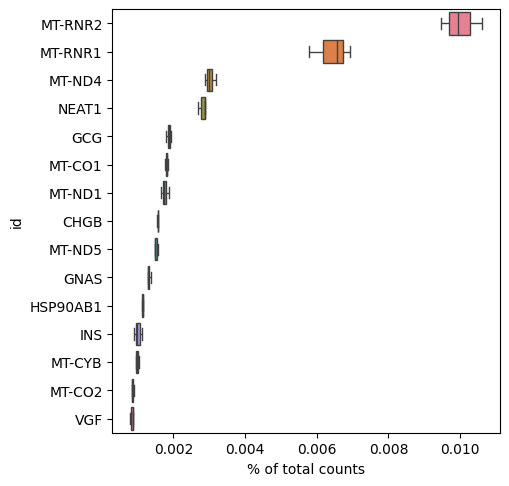

In [15]:
sc.pl.highest_expr_genes(anndata, n_top=20, )

Unfortunately, this sample only appears to have 3 cells populating the dataset, which is an unexpectedly low number and not sufficient for running the analysis that was planned.  Loading an alternate sample (HPAP-109), was unable to be succesfully compiled beyond its alignment.

## Planned Data Analysis

Below would represent the ideal outcomes of successfully loading and annotating the scRNAseq data for analysis within scanpy.

In [18]:
adata=scanpy.read_10x_mtx('D:/')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 14822 × 32738
    var: 'gene_ids', 'feature_types'

### QC

In [6]:
sc.pp.filter_cells(adata, min_genes=200)

Remove cells with gene counts below 200 (outliers which likely do not represent actual cells)

In [7]:
#Filter doublets
#adata = scanpy.external.pp.scrublet(adata)
#adata = adata[adata.obs.predicted_doublet == False]

Code which performs doublet prediction via the scrublet library callable within the scanpy object.  Annotation is added under "predicted_doublet" column.  Doublet removal was not used in the QC for this dataset

In [8]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.pct_counts_mt < 15, :]

Annotation of mitochondrial genes which begin with "MT-" via gene naming convention.  Cells with high % of mitochondrial gene count are considered low quality as mitochondrial genes are not from the nucleus and are not the focus of this study.  We will be filtering any cells that have more than 15% mitochondrial genes by total count.

In [9]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

C:\Users\Kevin\anaconda3\lib\site-packages\anndata\_core\anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


### Violin plot of the quality metrics we will be using to filter the data.  Number of genes counted, total counts, and percentage of mitochondrial counts are shown

In [10]:
#Remove genes with too many genes_by_counts and mt>15
adata_5kcount=adata[adata.obs.n_genes_by_counts < 5000, :]
adata.layers['raw_counts']=adata.X.copy()

Genes with counts above 5000 will be considered an outlier which may skew the results of our analysis and will be filtered

In [11]:
sc.pl.violin(adata_5kcount, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

### Quality metrics after filtering.  See total count reduction from 2500000 to 140000

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat")

Data will now be normalized to 10,000 counts per gene so that gene counts can be more easily compared.  After normalization, data will be logarithmized to bring the values closer so the scale of the data can be more easily captured.  Genes with high variation in their counts will be annotated as "highly_variable_genes" via the normalized dispersion.  The normalized dispersion is obtained by scaling with the mean and standard deviation of the dispersions for genes falling into a given bin for mean expression of genes. This means that for each bin of mean expression, highly variable genes are selected.

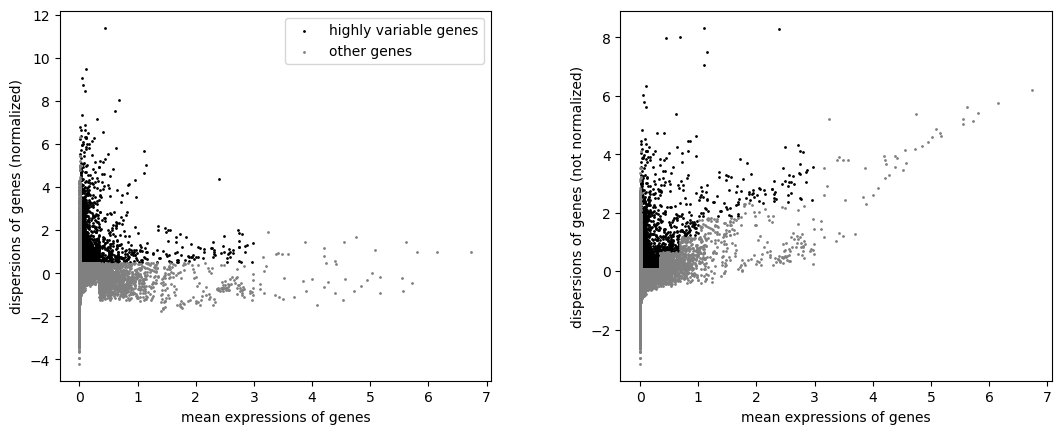

In [13]:
sc.pl.highly_variable_genes(adata)
adata.raw=adata
#save differential gene expression in .raw object for UMAP analysis

### Figures showing the dispersion of the highly variable genes(black) compared to the normal genes(grey).  Note how the dispersion increases as the gene expression is reduced 

In [14]:
#adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

Highly variable data within the total_counts and pct_counts_mt columns will be regressed out.
The data will also be scaled so that the means of each gene is 0.  This is necessary for Principle Component Analysis(PCA).  High outliers above 10 will be removed.

## Clustering (PC Analysis)

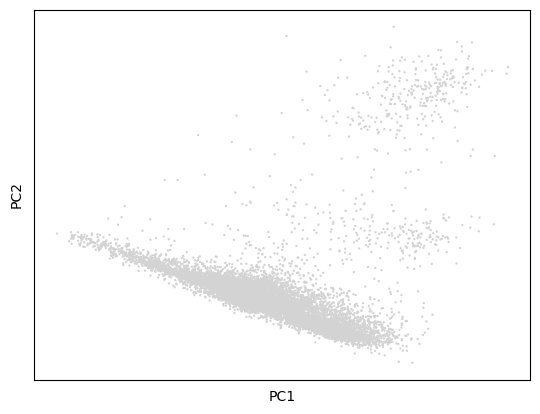

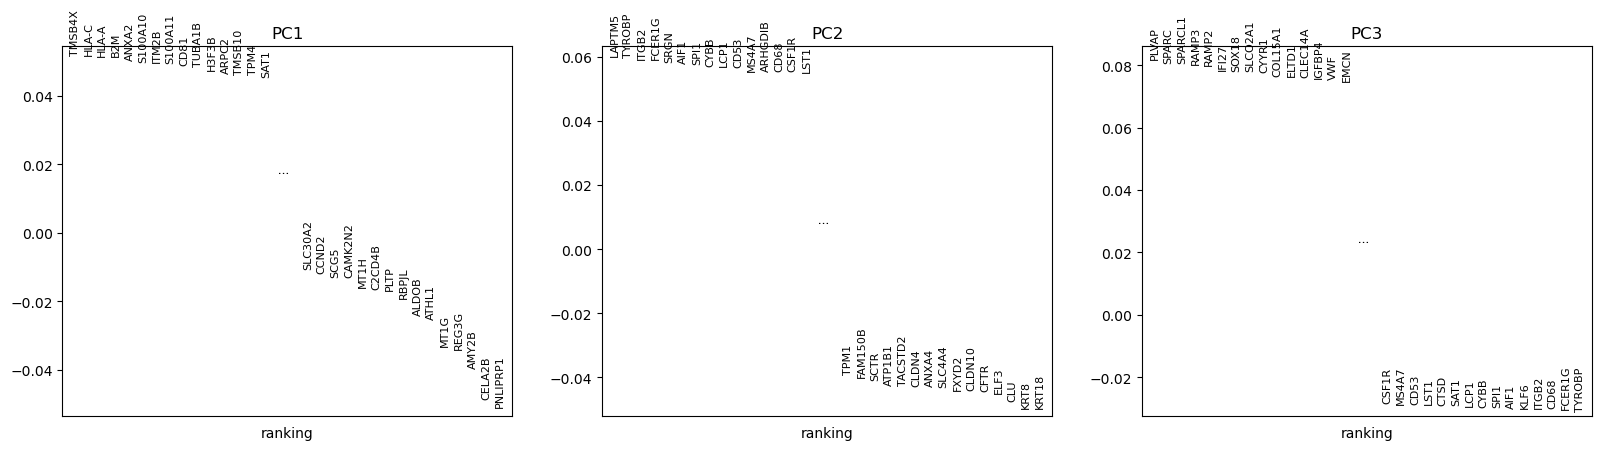

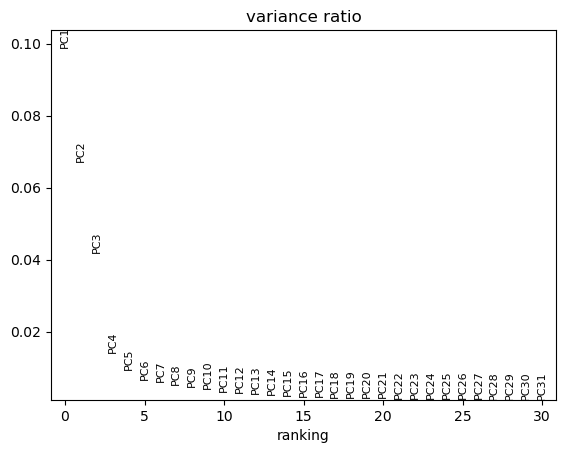

In [15]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_overview(adata)  # plot the pca results
#no equivalent to Seurat elbow plot in scanpy

Scanpy algorithm "arpack" is used to perform PCA on the dataset so we can identify the optimal number of principle components to capture most of the variation in the data while still reducing the dimentionality of it.

### Resulting graphs show the analysis across 2 and 3 PCs and the genes which contribute the majority of the variance to each PC.  Final graph shows the amount of variance captured from each PC, with a majority of the variance being captued by PC14.

In [16]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=14)

Calculate neighbor graph using scanpy neighbors function [2] 
(Ref: [2]McInnes & Healy (2018), UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, arXiv.)

In [17]:
sc.tl.louvain(adata, resolution=0.8)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph

Perform initial clustering using louvain algorithm on dataset.  Neighborhood graph and clustering information is then annotated to data as paga.

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


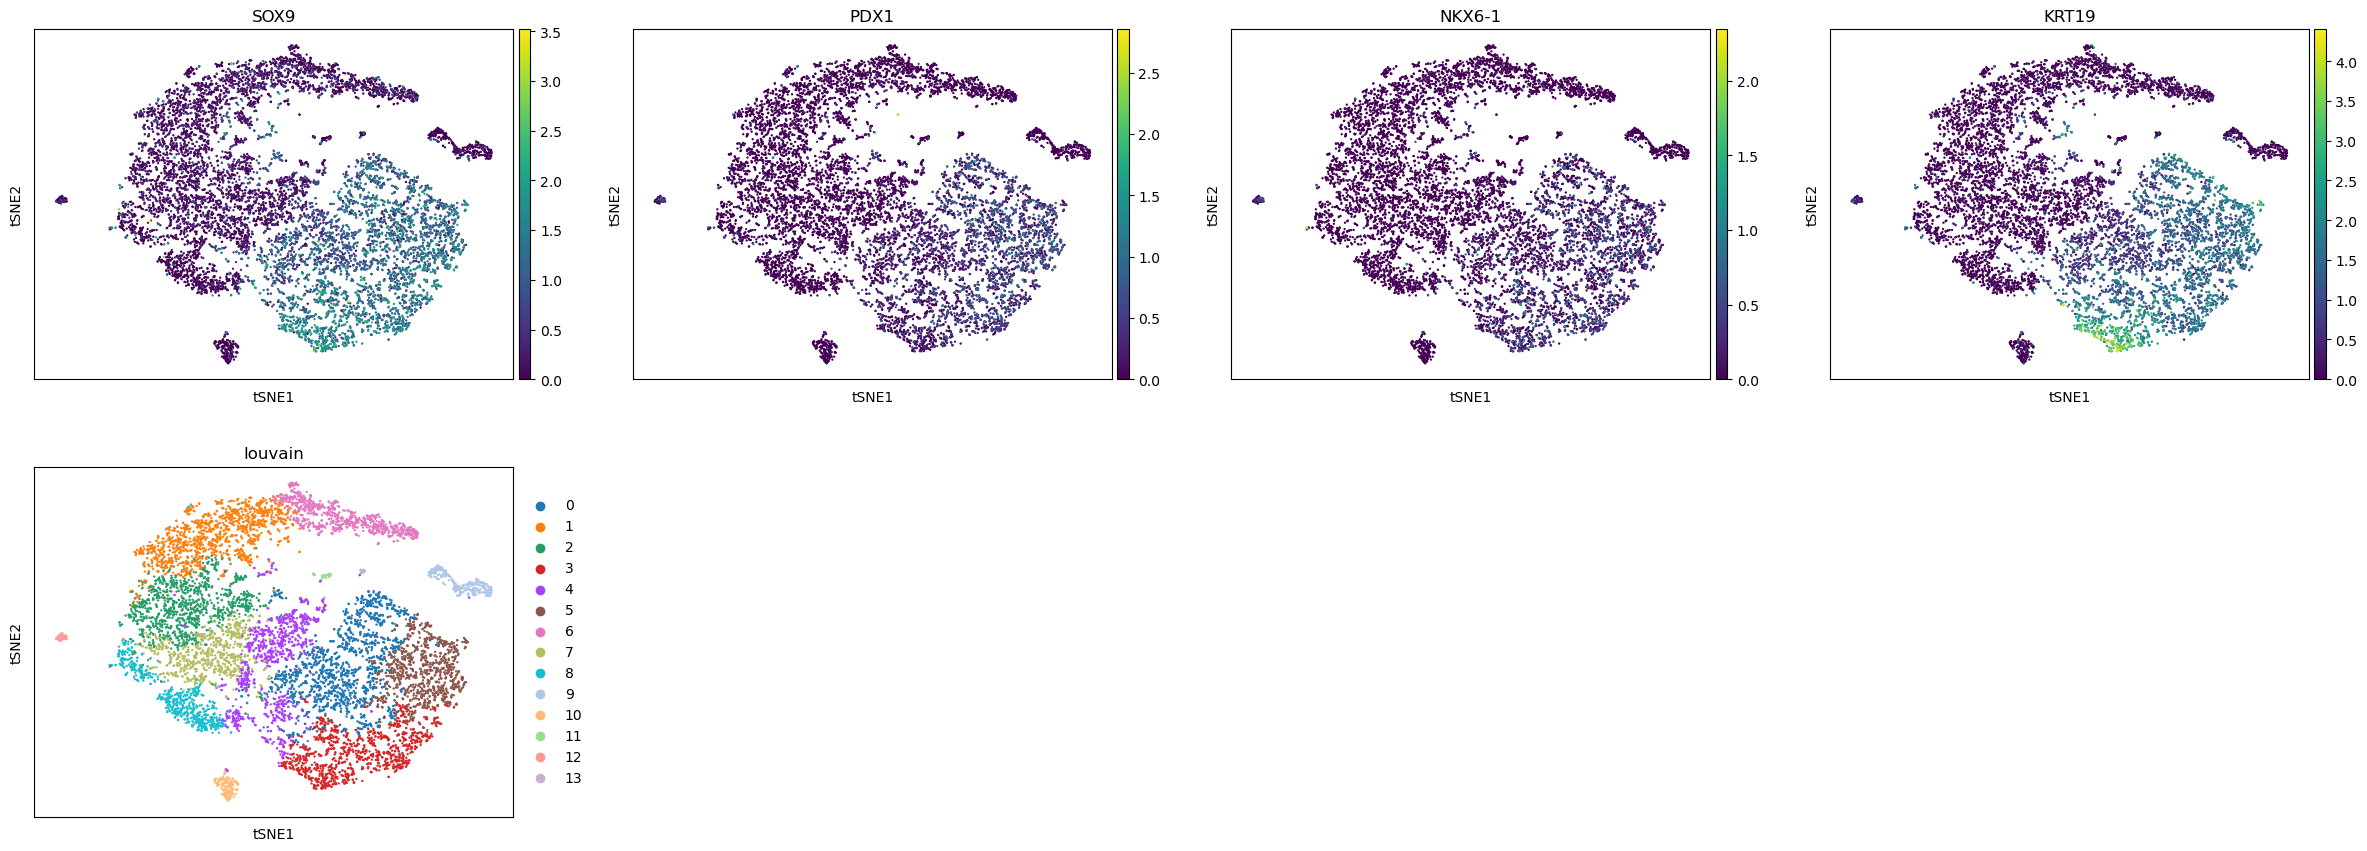

In [18]:
sc.tl.umap(adata, init_pos='paga')
sc.tl.tsne(adata, n_pcs=14, learning_rate=200)
sc.pl.umap(adata, color=["SOX9", "PDX1", "NKX6-1","KRT19", "louvain"])
sc.pl.tsne(adata, color=["SOX9", "PDX1", "NKX6-1", "KRT19", "louvain"])

Unifold Manifold Approximation and Projection as well as t-stochastic Neighborhood Embedding are performed on the dataset using the correlated scanpy functions.
After the UMAP and tsNE data is annotated to the AnnData, the results can be plotted with grouping by gene of interest and clustering results to highlight the location of the cells or clusters of interest relative to the entire dataset.

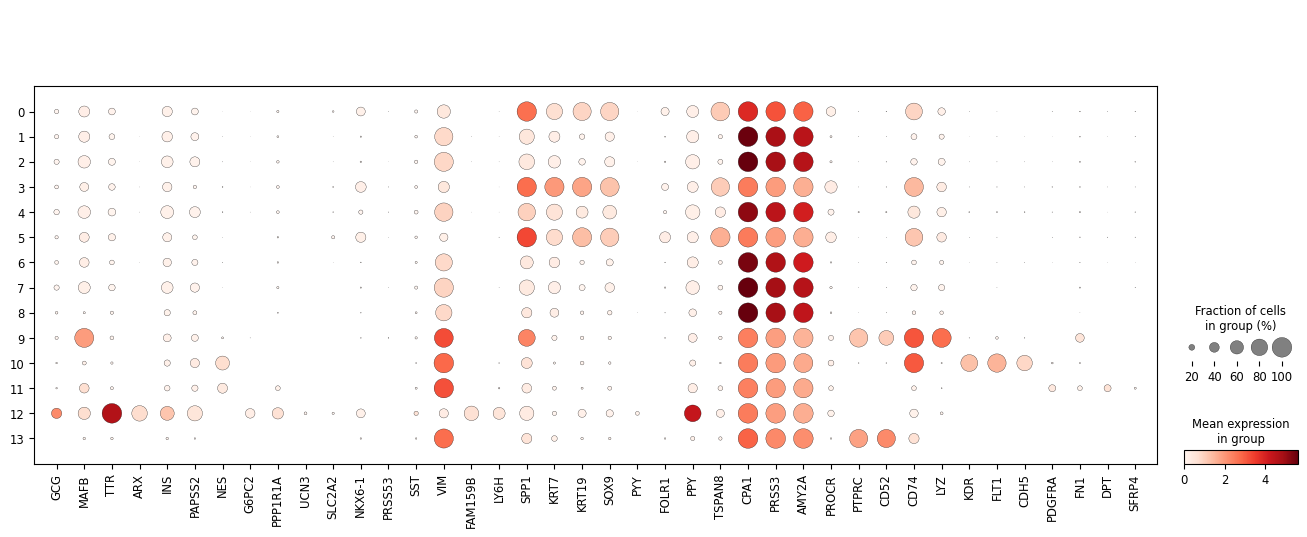

In [19]:
adata
genes=["GCG", "MAFB", "TTR", "ARX", "INS", "PAPSS2", "NES", "G6PC2", "PPP1R1A", "UCN3", "SLC2A2", "NKX6-1", "PRSS53", "SST", "VIM", "FAM159B", "LY6H", "SPP1", "KRT7", "KRT19", "SOX9", "PYY", "FOLR1", "PPY", "TSPAN8", "CPA1", "PRSS3", "AMY2A", "PROCR", "PTPRC", "CD52", "CD74", "LYZ", "KDR", "FLT1", "CDH5", "PDGFRA", "FN1", "DPT", "SFRP4"]
sc.pl.dotplot(adata, genes, groupby='louvain')

### Dotplot of marker genes is used to identify distinct cell types identified within each cluster.  Clusters which end up identifying the same cell type will be combined.

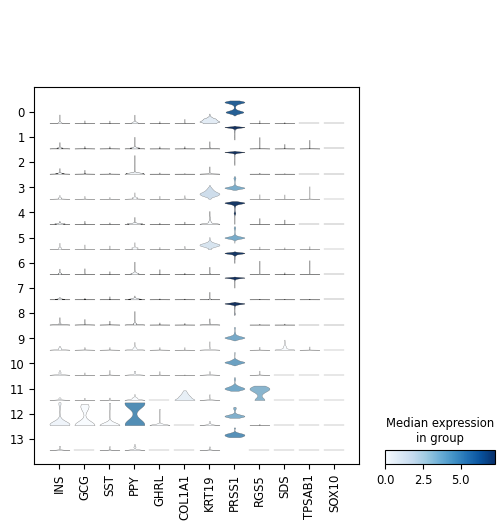

In [20]:
sc.pl.stacked_violin(adata, ["INS","GCG","SST","PPY","GHRL","COL1A1","KRT19","PRSS1","RGS5","SDS","TPSAB1","SOX10"], groupby='louvain')
sc.pl.dotplot(adata, ["INS","GCG","SST","PPY","GHRL","COL1A1","KRT19","PRSS1","RGS5","SDS","TPSAB1","SOX10"], groupby='louvain')

### Other marker gene comparison for finding pancreas stellate cells (COL1A1 and RGS5)

In [21]:
sc.pl.stacked_violin(adata, ["TNFRSF1B", "IL10RA", "IL1RL1", "IFNGR2", "IFNG", "HLA-DRA"], groupby='louvain')

In [22]:
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

Comparison of each cluster to all other clusters using t-test to determine significantly expressed genes.  Plot shows the top 15 differentially expressed genes.

In [23]:
result=adata.uns['rank_genes_groups']
groups=result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(15)

0_n  0_p      1_n  1_p      2_n  2_p      3_n  3_p       4_n  \
0     SLC4A4  0.0    PRSS1  0.0    PRSS1  0.0  TACSTD2  0.0     REG1B   
1      ANXA4  0.0    CTRB1  0.0   CELA3A  0.0    ANXA2  0.0     REG1A   
2     ATP1A1  0.0   CELA3A  0.0   SPINK1  0.0     CFTR  0.0     CUZD1   
3     ATP1B1  0.0     CTRC  0.0     CPB1  0.0  S100A10  0.0     PRSS3   
4        CLU  0.0     CPA2  0.0     CPA2  0.0     TPM1  0.0    SPINK1   
5       CFTR  0.0  PLA2G1B  0.0   CELA3B  0.0     KRT8  0.0      CPA2   
6      FXYD2  0.0     CLPS  0.0  PLA2G1B  0.0     MMP7  0.0    CELA3A   
7    S100A10  0.0   SPINK1  0.0     KLK1  0.0     CD59  0.0      CPB1   
8      ANXA2  0.0     SYCN  0.0     CPA1  0.0   TM4SF1  0.0   PLA2G1B   
9       SOD3  0.0   CELA3B  0.0     CTRC  0.0     CCL2  0.0    CELA3B   
10      IER3  0.0      CEL  0.0    CTRB1  0.0    HLA-B  0.0     CTRB2   
11  SERPINA5  0.0     CPA1  0.0    PRSS3  0.0     ACTB  0.0     PRSS1   
12    CLDN10  0.0    PRSS3  0.0     CLPS  0.0    GSTP1  0.0      CPA1   
13  HSP90AA1  0.0      GP2  0.0      CEL  0.0    KRT18  0.0     CTRB1   
14    CITED4  0.0     CPB1  0.0      GP2  0.0    EPCAM  0.0  PNLIPRP1   

              4_p  ...      9_n            9_p     10_n           10_p  \
0   5.734311e-146  ...   TYROBP  2.703758e-276      B2M  3.947361e-184   
1   2.146229e-135  ...     GPX1  5.397597e-258  SPARCL1  7.401888e-144   
2   1.633143e-126  ...     CYBA  6.387497e-263   IFITM3  3.445354e-152   
3   4.262168e-122  ...   TMSB4X   0.000000e+00      A2M  4.261868e-129   
4   2.739931e-122  ...   FCER1G  6.069360e-232    HLA-A  1.387573e-145   
5   8.685774e-122  ...      FTL  1.164695e-241    PLVAP  6.518530e-127   
6   2.872785e-120  ...   LAPTM5  2.150965e-231    HLA-B  3.743037e-146   
7   4.400241e-119  ...     ACTB  4.320044e-290    HLA-E  3.315940e-126   
8   2.607483e-117  ...      B2M  5.300953e-287   IGFBP4  3.743524e-120   
9   3.617048e-115  ...     CFL1  1.030134e-241    ITM2B  1.509776e-129   
10  7.635617e-114  ...   TMSB10  1.284597e-241    HLA-C  1.442266e-127   
11  9.152129e-114  ...  ARHGDIB  1.013745e-199      GSN  2.407078e-115   
12  1.983730e-108  ...     PFN1  2.408533e-215    GNG11  9.817982e-115   
13  7.407173e-107  ...    ITGB2  1.026385e-193   TGFBR2  7.899012e-112   
14  5.698402e-102  ...     NPC2  1.006590e-197      RDX  9.416964e-112   

        11_n          11_p     12_n          12_p      13_n          13_p  
0     IGFBP7  6.564100e-48     SCG5  1.174603e-46    MALAT1  1.943664e-29  
1    SPARCL1  1.214205e-42   PCSK1N  2.404948e-43       B2M  3.330522e-27  
2     IFITM3  8.234185e-39      CPE  2.106808e-33    S100A4  5.555723e-23  
3   C11orf96  8.591157e-38     CHGB  2.361674e-30    CORO1A  9.311997e-22  
4        A2M  1.922065e-36    NPDC1  1.384095e-29    TMSB4X  3.147587e-21  
5     MALAT1  2.151103e-37     SCG3  3.021486e-28   PTPRCAP  7.353967e-20  
6     IFITM2  3.306579e-35     CST3  1.601054e-26  SH3BGRL3  2.418490e-18  
7      CALD1  3.896030e-34  CAMK2N1  1.613763e-25     HLA-A  3.931782e-18  
8       TPM2  2.989720e-31     SCGN  1.991254e-25      CFL1  9.950866e-18  
9     IGFBP4  1.187235e-30      TTR  9.976326e-25     HLA-C  1.404469e-17  
10     MFGE8  3.820922e-30     SCG2  2.663503e-24     HLA-B  1.986090e-17  
11    LGALS1  6.563532e-30    APLP1  3.694952e-24      ACTB  2.075742e-17  
12      CD81  1.245692e-30    PTPRN  1.816142e-23      CD48  6.155074e-17  
13       VIM  6.161334e-29     QPCT  2.245012e-23       EVL  3.177806e-16  
14      LDHA  9.024717e-29     SSR4  2.103617e-23     RPS27  3.292059e-16  

[15 rows x 28 columns]

# Conclusions


This experience shows that there are still some gaps that need to be covered from the documentation available with online databases in order to make them more readily available to be analysed by other bioinformaticians.  I was able to get as far as aligning and sorting the data by genome position.  However, when it came to tabulating the feature reads using HTSeq, there were some questions regarding quality of reads that would require deeper knowledge of the specific protocols run by the multiple institutions which are contributing to the database.  Since there is no existing reference on the UPenn CellxGene tool which directly pulls from these directories, there may be an issue with processing only a few samples at a time.  Unfortunately this type of issue was not able to be resolved within the time span of the project.


The general scripts and construction of the pipeline will function and produce readable data which can be then run through the following scanpy analysis.  However, in order to produce higher quality data, careful application of the options for each of the functions being used must be taken into account.


This document can also serve to help those who wish to learn how to run alignment programs within the Windows Operating System, so that there is a higher level of familiarity when performing file organization and creation.  Some minor details like HTSeq now having the functionality to take multiple alignment files in the argument and samtools no longer needing to call samtools view to convert file formats reflect the modern changes to the programs as of May, 2025.


As a size of N=1, this data set is of insufficient size to make significant claims about a population.  The pipeline would have to be utilized by a computer with access to greater resources than what is currently available for this project in order to process the data set necessary to produce a more complete picture.


I would like to thank the professors at New York Tandon Bridge, who have helped equip me with the skills and tools to produce this pipeline, as well as the many academic and FOSS resources online which provided the community to share and bolster them.  I hope that there is something of value which can be taken away from this effort.